In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [176]:
movies = pd.read_csv('../data/movies.csv')

In [177]:
movies.dropna(how='all',inplace=True)

In [178]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,6.544800e+04,6.544800e+04,65448.000000,6.544800e+04,65448.000000,65448.000000,65448.000000
mean,4.259326e+06,2.797872e+05,11.539377,1.186000e+07,99.833883,6.072039,344.672442
std,1.808514e+07,3.028686e+05,20.178948,7.057102e+07,23.019464,1.302299,1423.633577
min,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,3.934075e+04,3.715000,0.000000e+00,88.000000,5.500000,13.000000
50%,0.000000e+00,1.276780e+05,7.076000,0.000000e+00,97.000000,6.222000,34.000000
75%,0.000000e+00,4.666722e+05,13.117000,0.000000e+00,110.000000,6.881000,122.000000
max,4.600000e+08,1.261525e+06,1827.462000,2.923706e+09,608.000000,10.000000,35411.000000


In [179]:
select_lang = pd.concat([movies.groupby('original_language')['id'].count(),movies.groupby('original_language')['popularity'].mean()],axis=1).rename(columns={'id':'count'}).sort_values(by=['count','popularity'],ascending=False)[:30].index

In [180]:
movies = movies[movies.original_language.isin(select_lang)]

In [181]:
movies = movies[(movies.runtime >= 60) & (movies.runtime <= 200)]

In [182]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,6.338000e+04,6.338000e+04,63380.000000,6.338000e+04,63380.000000,63380.000000,63380.000000
mean,4.385817e+06,2.723392e+05,11.751054,1.221105e+07,100.689476,6.094772,354.387204
std,1.834066e+07,2.979996e+05,20.333184,7.153978e+07,20.613677,1.224029,1442.534955
min,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,60.000000,0.000000,0.000000
25%,0.000000e+00,3.843575e+04,3.869750,0.000000e+00,88.000000,5.511000,14.000000
50%,0.000000e+00,1.212505e+05,7.253500,0.000000e+00,97.000000,6.220000,36.000000
75%,0.000000e+00,4.547960e+05,13.351500,0.000000e+00,110.000000,6.873000,127.000000
max,4.600000e+08,1.261525e+06,1827.462000,2.923706e+09,200.000000,10.000000,35411.000000


In [194]:
movies = movies[(movies['vote_average'] != 0) & (movies['vote_count'] != 0)]

<Axes: >

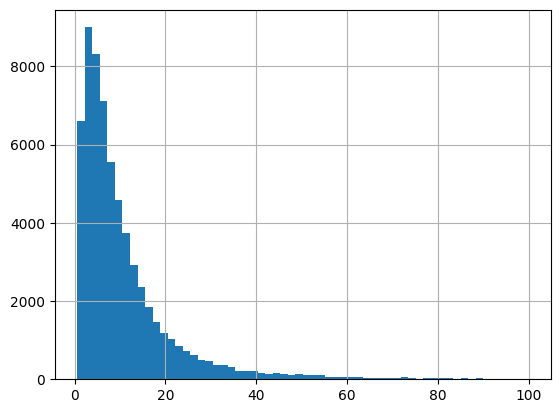

In [198]:
movies[movies['popularity'] < 100]['popularity'].hist(bins=60)

<Axes: >

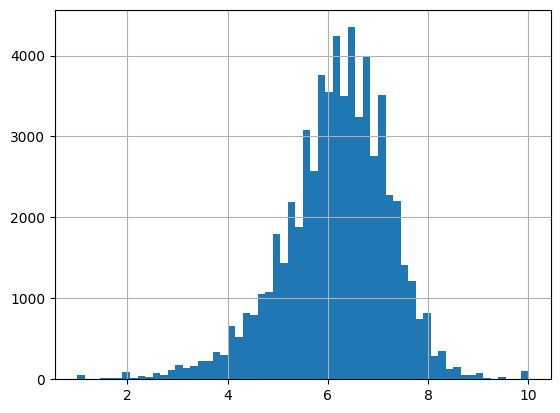

In [201]:
movies['vote_average'].hist(bins=60)

In [254]:
movies['vote_average'].describe()

count    62604.000000
mean         6.153159
std          1.073205
min          1.000000
25%          5.554000
50%          6.238500
75%          6.880000
max         10.000000
Name: vote_average, dtype: float64

In [257]:
movies = movies[movies['vote_average'] > 5.5]

**Диапазон оценок 5.5 - 8 Для домохозяек**
**Диапозон > 8 для ценителей**

In [207]:
movies = movies[~(movies['overview'].isnull())]

In [208]:
movies = movies[~(movies.genres == '[]')]

In [217]:
movies[movies.title == "Rosemary's Baby"]

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
464,False,/sDNpacyIpSL8YRNkVR4qOmteXBX.jpg,"{'id': 264338, 'name': ""Rosemary's Baby Collec...",3200000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,805.0,tt0063522,en,Rosemary's Baby,...,1968-06-12,33395426.0,138.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Conceived in terror. Born in fear.,Rosemary's Baby,False,7.822,3689.0
24403,False,/sDNpacyIpSL8YRNkVR4qOmteXBX.jpg,"{'id': 264338, 'name': ""Rosemary's Baby Collec...",3200000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,805.0,tt0063522,en,Rosemary's Baby,...,1968-06-12,33395426.0,138.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Conceived in terror. Born in fear.,Rosemary's Baby,False,7.822,3689.0


In [230]:
movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [265]:
movies.reset_index(drop=True,inplace=True)

In [270]:
movies.release_date.sort_values(ascending=False)

27383    2024-03-20
26774    2024-03-14
35118    2024-03-08
28192    2024-03-08
46175    2024-03-07
            ...    
37643    1913-12-20
18336    1913-10-27
24764    1913-09-17
11790    1913-08-22
5934     1911-03-11
Name: release_date, Length: 47476, dtype: object

In [271]:
movies[movies.release_date == '1911-03-11']

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5934,False,/jEk1QNc9fBnbboh9t3nooPoIxBm.jpg,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,70512.0,tt0002130,it,L’Inferno,...,1911-03-11,0.0,72.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,"Abandon all hope, ye who enter here.",Dante's Inferno,False,6.504,128.0


In [272]:
movies.iloc[11790]

adult                                                                False
backdrop_path                             /pSrl9LPOKVGLh9DAvEaAwlpZAYz.jpg
belongs_to_collection                                                  NaN
budget                                                                 0.0
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...
homepage                                                               NaN
id                                                                 28627.0
imdb_id                                                          tt0003419
original_language                                                       de
original_title                                        Der Student von Prag
overview                 Prague, Bohemia, 1820. Balduin, a penniless st...
popularity                                                           5.911
poster_path                               /tO2zgNEY0MqtvEyPioTTfHgmN2Q.jpg
production_companies     

In [277]:
movies[movies.title== 'The Matrix']

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
52,False,/8K9qHeM6G6QjQN0C5XKFGvK5lzM.jpg,"{'id': 2344, 'name': 'The Matrix Collection', ...",63000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.warnerbros.com/matrix,603.0,tt0133093,en,The Matrix,...,1999-03-31,463517383.0,136.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Believe the unbelievable.,The Matrix,False,8.213,24624.0


In [283]:
movies[(movies.release_date > '1940-01-01') & (movies.release_date < '1951-01-01')].sort_values(by='popularity',ascending=False)[:30]

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28701,False,/rH0DPF7pB35jxLxKb3JRUgCrrnp.jpg,"{'id': 55419, 'name': 'Cinderella Collection',...",2900000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/cinderella-1950,11224.0,tt0042332,en,Cinderella,...,1950-02-22,263600000.0,74.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The greatest love story ever told.,Cinderella,False,7.044,6432.0
29027,False,/rH0DPF7pB35jxLxKb3JRUgCrrnp.jpg,"{'id': 55419, 'name': 'Cinderella Collection',...",2900000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/cinderella-1950,11224.0,tt0042332,en,Cinderella,...,1950-02-22,263600000.0,74.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The greatest love story ever told.,Cinderella,False,7.044,6432.0
1227,False,/rH0DPF7pB35jxLxKb3JRUgCrrnp.jpg,"{'id': 55419, 'name': 'Cinderella Collection',...",2900000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/cinderella-1950,11224.0,tt0042332,en,Cinderella,...,1950-02-22,263600000.0,74.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The greatest love story ever told.,Cinderella,False,7.044,6432.0
44788,False,/rH0DPF7pB35jxLxKb3JRUgCrrnp.jpg,"{'id': 55419, 'name': 'Cinderella Collection',...",2900000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/cinderella-1950,11224.0,tt0042332,en,Cinderella,...,1950-02-22,263600000.0,74.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The greatest love story ever told.,Cinderella,False,7.044,6432.0
1164,False,/1ZKHzSGJm0kvlCp4echAOtKnDTm.jpg,"{'id': 87250, 'name': 'Bambi Collection', 'pos...",858000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",http://movies.disney.com/bambi,3170.0,tt0034492,en,Bambi,...,1942-08-14,267447150.0,70.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A great love story.,Bambi,False,7.013,5400.0
1150,False,/iFPpb2KIWKwBfyqSJivE4JegFPP.jpg,NaN,2600000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",https://movies.disney.com/pinocchio,10895.0,tt0032910,en,Pinocchio,...,1940-02-23,164000000.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"When you wish upon a star, your dreams come true.",Pinocchio,False,7.106,5610.0
42678,False,/iFPpb2KIWKwBfyqSJivE4JegFPP.jpg,NaN,2600000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",https://movies.disney.com/pinocchio,10895.0,tt0032910,en,Pinocchio,...,1940-02-23,164000000.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"When you wish upon a star, your dreams come true.",Pinocchio,False,7.106,5610.0
1439,False,/aRVQ1EgTx3vbhK6qls2O834bPQc.jpg,NaN,812000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,11360.0,tt0033563,en,Dumbo,...,1941-10-31,1600000.0,64.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The One...The Only...The FABULOUS...,Dumbo,False,7.004,4743.0
453,False,/ch3lDc4xQ9MpsNEpnRhvR8PIxxK.jpg,NaN,3180000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,1585.0,tt0038650,en,It's a Wonderful Life,...,1946-12-20,9644124.0,130.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It's a wonderful laugh! It's a wonderful love!,It's a Wonderful Life,False,8.269,4074.0
353,False,/87wqeMeUeMRLjsE1IWNKJcPlpuC.jpg,NaN,878000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,289.0,tt0034583,en,Casablanca,...,1943-01-15,10462500.0,102.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,They had a date with fate in Casablanca!,Casablanca,False,8.164,5140.0
